In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl

from boutdata.restart import addvar
import glob
import shutil

sys.path.append(r"/users/mjk557/scratch/scripts/sdtools")

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *

%load_ext autoreload
%autoreload 2

In [2]:
db = CaseDB(
    case_dir = r"/ssd_scratch/hcases",
    grid_dir = r"/ssd_scratch/hcases"
    )

In [3]:


# choice = "b4b-40eV_1e17_fixndiff"
# choice = "b5b-40eV_1e18_fixndiff"
# choice = "b6b-40eV_1e19_fixndiff"
# choice = "c1a-40eV_1e17_newbout"
# choice = "c1b-40eV_1e17_precon"
# choice = "c2a-precon"
choice = "b1-jan23base"
# choice = "c1c-40eV_1e17_lofloor"
# choice = "c2ac-copy"
# choice = "c2ad-copy"
# choice = "b3a-t3-small_temp_steps"

case, caseng = Load.case_2D(db.casepaths[choice], gridfilepath = db.gridpaths["g3a4-lores.nc"],
                    double_load = True)

--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.607E+00 [m3]
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.032E+00 [m3]


In [12]:


dfiles = []


path = db.casepaths["b0b-try-add-vars"]

file_list = glob.glob(os.path.join(path, "BOUT.restart.*"))
nfiles = len(file_list)

print("Number of restart files: %d" % (nfiles,))
# Loop through all the restart files
for filename in file_list:
        # print(filename)
    # Open the restart file for writing (modification)
    with DataFile(filename, write=True) as df:
        dfiles.append(df)
        size = None
        print(df.size("Ne"))
        # Find a 3D variable and get its size
        # for varname in df.list():
        #     size = df.size(varname)
        #     if len(size) == 3:
        #         print(f"{varname}, size: {size}")
        #         break
        # if size is None:
        #     raise Exception("no 3D variables found")

    # # Create a new 3D array with input value
    # data = np.zeros(size) + value

    # # Set the variable in the NetCDF file
    # df.write(var, data)

Number of restart files: 10
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [13]:
for casename in ["b1-jan23base", "b0b-try-add-vars"]:
    with DataFile(os.path.join(db.casepaths[casename], "BOUT.restart.0.nc")) as df:
        
        print(f'{casename}:')
        print(f'Nd+ shape: {df["Nd+"].shape}')
        if "anomalous_Chi_d+" in df.keys():
            print(f'Chi_d+ shape: {df["anomalous_Chi_d+"].shape}')
        print("")
        


b1-jan23base:
Nd+ shape: (20, 9, 1)

b0b-try-add-vars:
Nd+ shape: (20, 9, 1)
Chi_d+ shape: (20, 9, 3)



In [12]:
shutil.copytree(
    r"/ssd_scratch/hcases/b1-jan23base",
    r"/ssd_scratch/hcases/b0b-try-add-vars",
    dirs_exist_ok=True
)

with DataFile(os.path.join(db.casepaths["b0b-try-add-vars"], "BOUT.restart.0.nc")) as df:
    print(df.keys())

['BOUT_VERSION', 'Bnorm', 'Bxy', 'Cs0', 'G1', 'G2', 'G3', 'J', 'MXG', 'MXSUB', 'MYG', 'MYPE', 'MYSUB', 'MZ', 'MZG', 'MZSUB', 'NVd', 'NVd+', 'NXPE', 'NYPE', 'NZPE', 'Nd', 'Nd+', 'Nnorm', 'Omega_ci', 'PE_XIND', 'PE_YIND', 'Pd', 'Pd+', 'Pe', 'Tnorm', 'ZMAX', 'ZMIN', 'dx', 'dy', 'dz', 'g11', 'g12', 'g13', 'g22', 'g23', 'g33', 'g_11', 'g_12', 'g_13', 'g_22', 'g_23', 'g_33', 'hist_hi', 'ixseps1', 'ixseps2', 'jyseps1_1', 'jyseps1_2', 'jyseps2_1', 'jyseps2_2', 'nx', 'ny', 'ny_inner', 'nz', 'rho_s0', 'run_id', 'run_restart_from', 'tt', 'zShift', 'zperiod', 'anomalous_Chi_d+']


In [10]:
# for var in ["Chi_d+", "Chi_e", "D_d+", "D_e", "nu_d+", "nu_e"]:

for var in ["Chi_d+"]:
    addvar(f"anomalous_{var}", [0,0,0], db.casepaths["b0b-try-add-vars"])

Number of restart files: 10
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.5.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.1.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.3.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.2.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.7.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.9.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.6.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.0.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.8.nc
/ssd_scratch/hcases/b0b-try-add-vars/BOUT.restart.4.nc


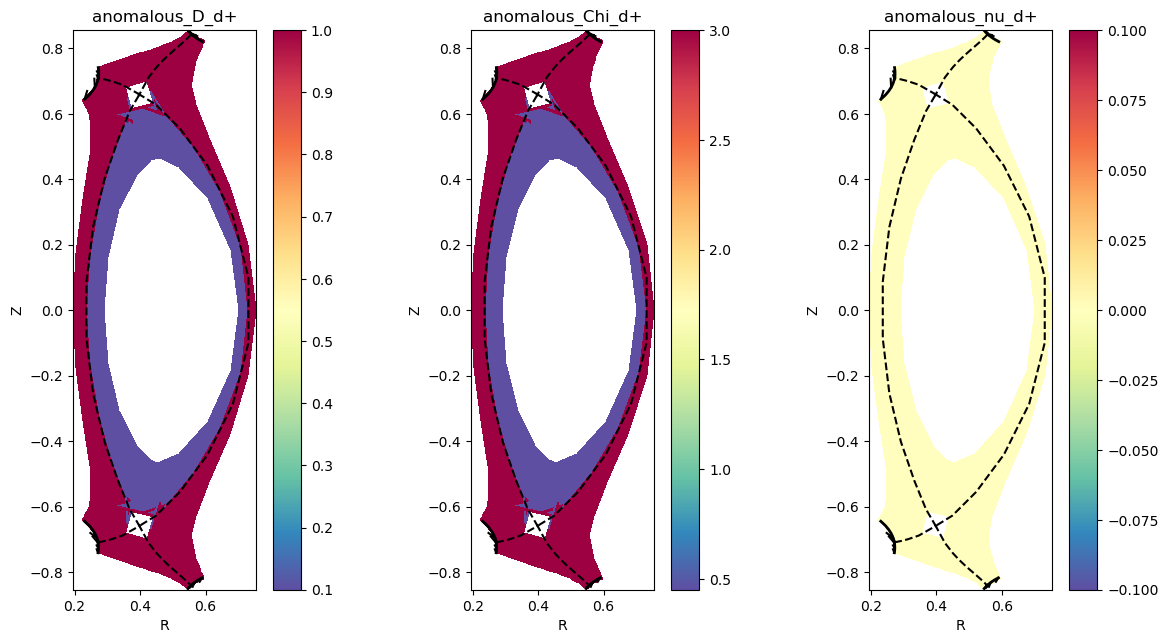

In [3]:
data = caseng.ds

cols = 3
fig, axes = plt.subplots(1,cols, figsize = (cols*4,6), dpi = 100)
# fig.subplots_adjust(wspace = 0)
fig.tight_layout(pad = 0.4)
tind = -1

x = "d+"

data[f"anomalous_D_{x}"].isel(t=tind).bout.pcolormesh(ax = axes[0], cmap = "Spectral_r", logscale = False)
data[f"anomalous_Chi_{x}"].isel(t=tind).bout.pcolormesh(ax = axes[1], cmap = "Spectral_r", logscale = False)
data[f"anomalous_nu_{x}"].isel(t=tind).bout.pcolormesh(ax = axes[2], cmap = "Spectral_r", logscale = False)

# [ax.set_ylim(-0.9,0) for ax in axes]
print("")

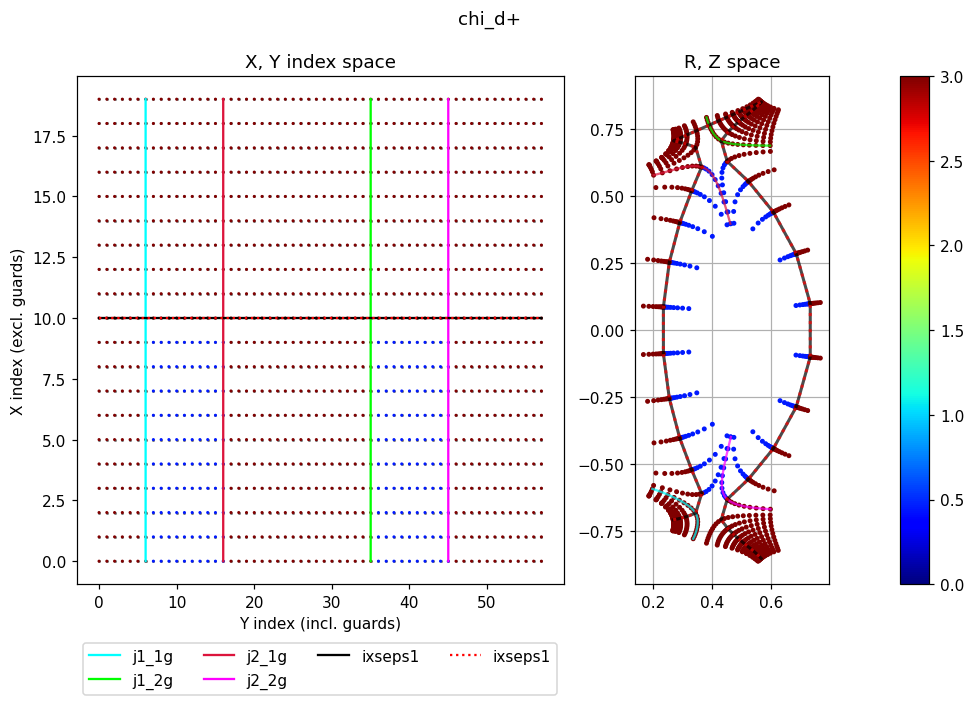

In [12]:
self = mesh

name = "chi_d+"

plt.style.use("default")


field = self.mesh[name]
cmap = plt.get_cmap("jet")


fieldnorm = field / np.max(field) * 1
colors = [cmap(x) for x in fieldnorm.flatten()]
norm = mpl.colors.Normalize(vmin=0, vmax=np.max(field))

fig, axes = plt.subplots(1,3, figsize = (10,6), gridspec_kw={'width_ratios': [5,2.0, 0.3]}, dpi = 110)
fig.subplots_adjust(wspace=0.3)
fig.suptitle(name)

self.plot_xy_grid(axes[0])
axes[0].scatter(self.yflat, self.xflat, c = colors, s = 1)

self.plot_rz_grid(axes[1])
axes[1].scatter(self.rflat, self.zflat, c = colors, s = 5)

cbar = mpl.colorbar.ColorbarBase(ax=axes[2], cmap = cmap, norm = norm)

In [7]:
list(mesh.mesh["chi_d+"].flatten())

[3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.

In [3]:

params = mesh.mesh.keys()

last_id = params.index("module_versions")
to_remove = params[last_id+1:]

for item in to_remove:
    del mesh.mesh[item]
    print(f"removed {item}")

AttributeError: __delitem__

In [ ]:
mesh.mesh["D_e"].

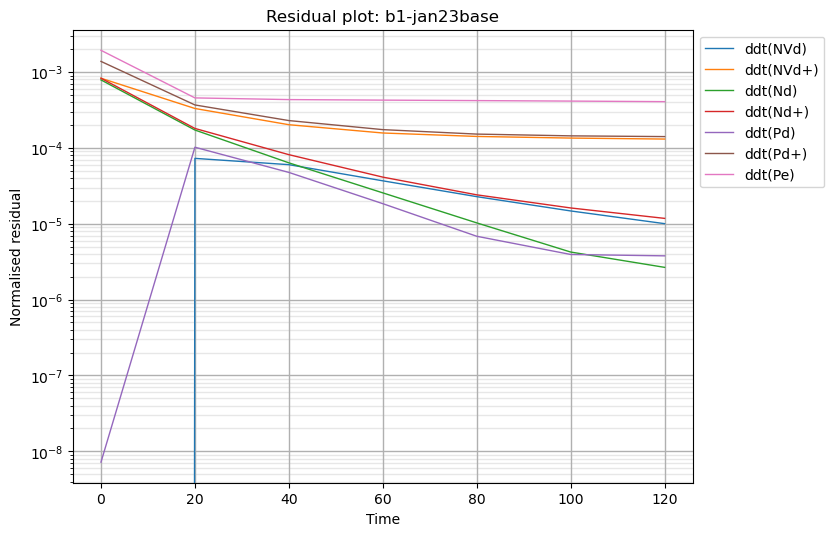

In [4]:
plot_ddt(caseng, smoothing = 1)

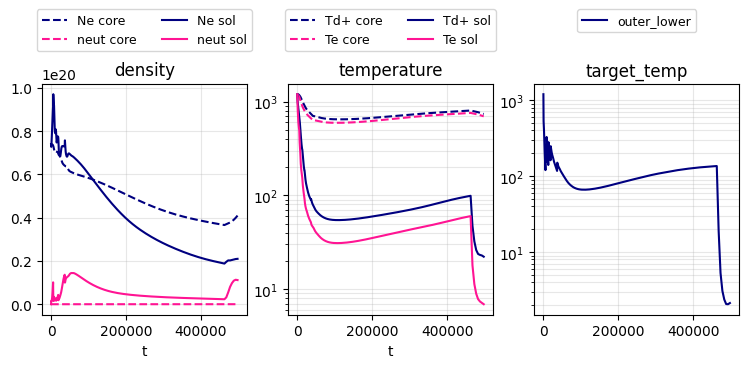

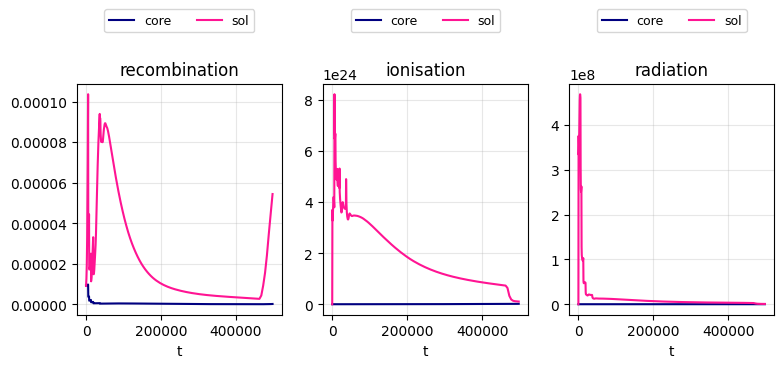

In [4]:
Monitor(case, [["density", "temperature","target_temp"],
               ["recombination", "ionisation", "radiation"]])
# Monitor(case, [["recombination", "ionisation", "radiation"]])

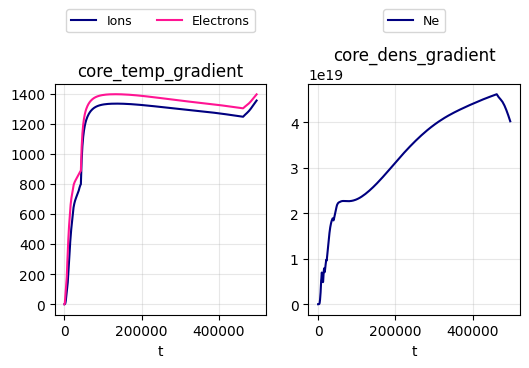

In [6]:
mon = Monitor(case,[["core_temp_gradient", "core_dens_gradient"]], settings = {"plot":{"xmin":None}})

In [33]:
mon.plot_settings

{'xmin': None, 'xmax': None}

{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}


/users/mjk557/.local/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


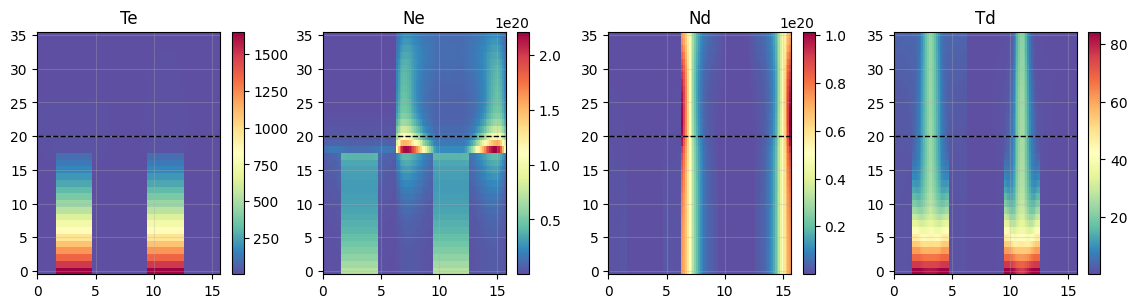

In [7]:
Monitor2D(caseng, "grid", [["Te", "Ne", "Nd", "Td"]])

{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}


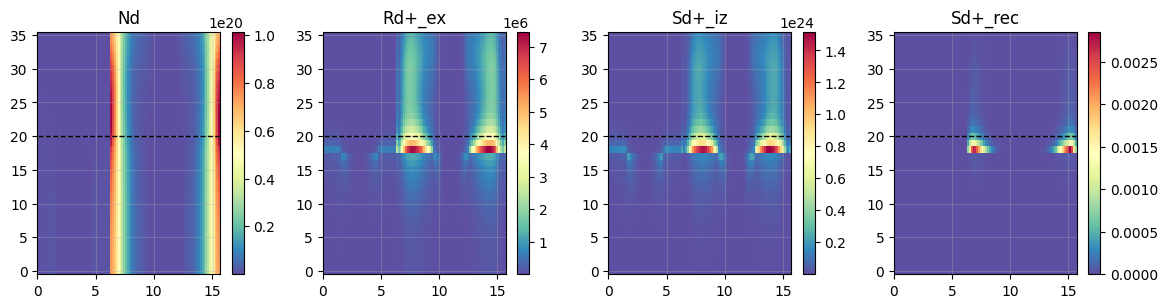

In [8]:
Monitor2D(caseng, "grid", [["Nd", "Rd+_ex", "Sd+_iz", "Sd+_rec"]])

{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}


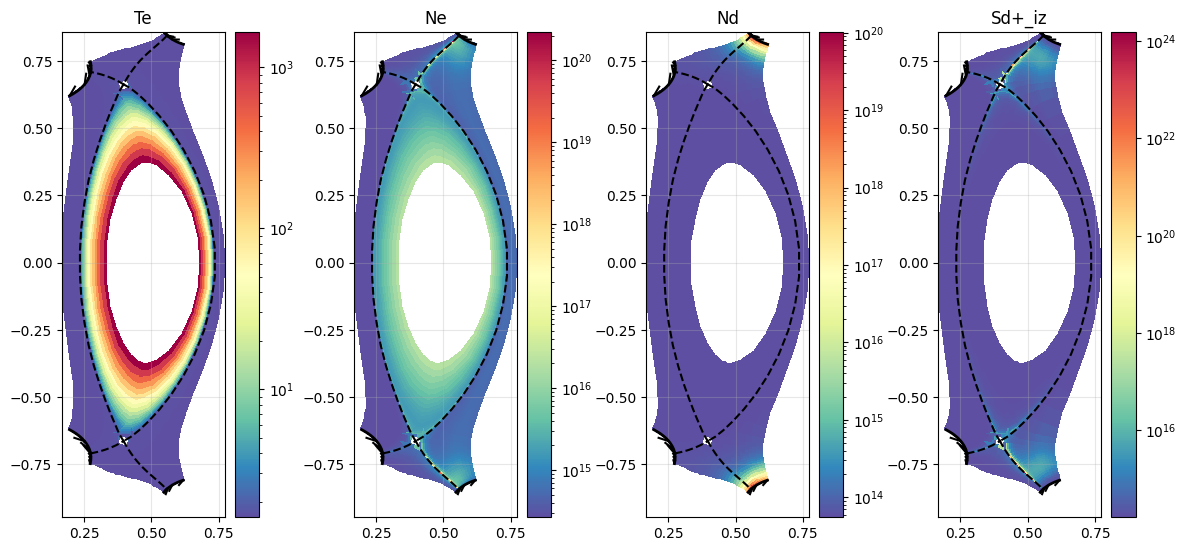

In [9]:
Monitor2D(caseng, "pcolor", [["Te", "Ne", "Nd", "Sd+_iz"]])

{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}


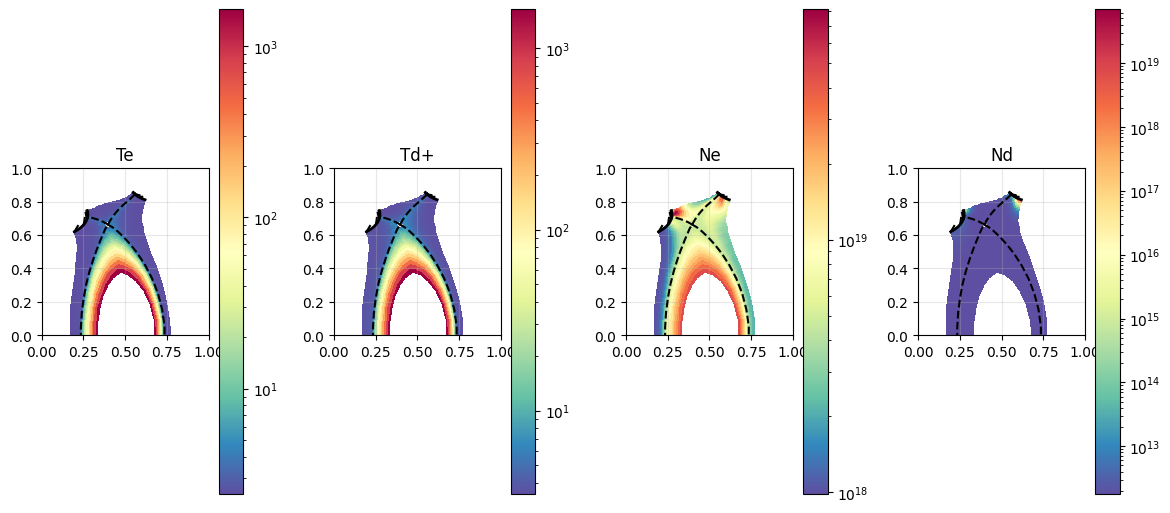

In [8]:
Monitor2D(caseng, "pcolor", [["Te", "Td+", "Ne", "Nd"]])

In [ ]:
Monitor2D.settings["plot"]

In [12]:
target = case.select_region("outer_lower_target")


Coordinates:
    dx                       (x, theta) float64 dask.array<chunksize=(20, 1), meta=np.ndarray>
    dy                       (x, theta) float64 dask.array<chunksize=(20, 1), meta=np.ndarray>
    dz                       (x, theta) float64 dask.array<chunksize=(20, 1), meta=np.ndarray>
    zShift                   (x, theta) float64 dask.array<chunksize=(20, 1), meta=np.ndarray>
  * t                        (t) float64 0.0 500.0 1e+03 ... 4.925e+05 4.975e+05
    psi_poloidal             (x, theta) float64 -0.02469 -0.02438 ... 0.01566
    R                        (x, theta) float64 0.5455 0.546 ... 0.6281 0.6391
    Z                        (x, theta) float64 -0.8543 -0.8537 ... -0.8029
    poloidal_distance        (x, theta) float64 0.2995 0.2994 ... 1.67 1.658
    poloidal_distance_ylow   (x, theta) float64 0.2972 0.2971 ... 1.668 1.656
    total_poloidal_distance  (x) float64 1.542 1.696 1.832 1.953 ... nan nan nan
    zShift_CELL_YLOW         (x, theta) float64 -9.73 -9.

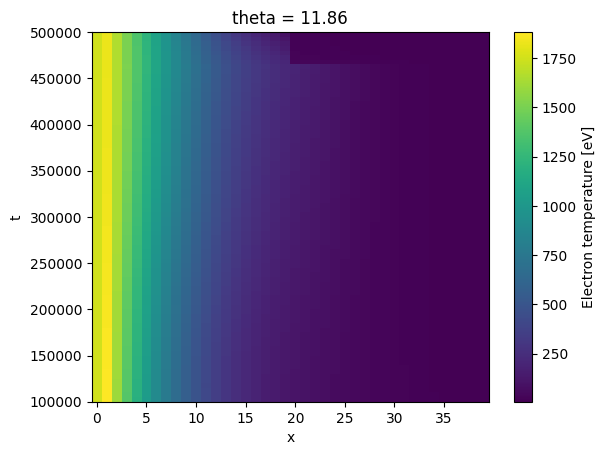

In [17]:
case.select_region("outer_midplane_a")["Te"].sel(t=slice(1e5,None)).plot()

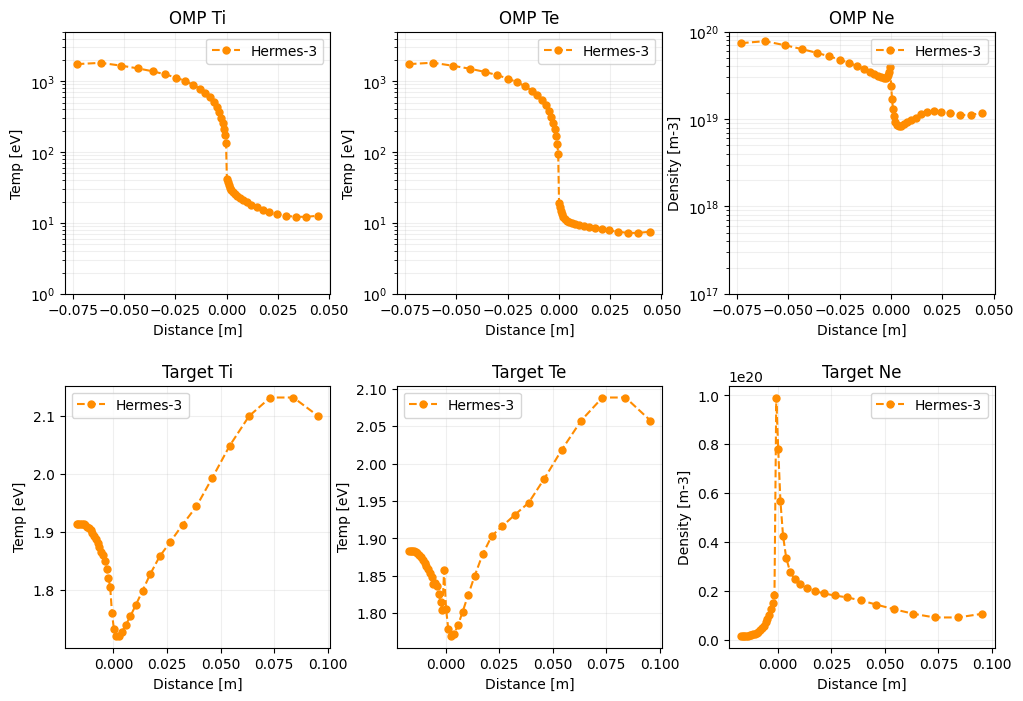

In [5]:
target = Target(case, "outer_lower")
omp = case.select_region("outer_midplane_a").isel(t=-1)

xsep = 0.736

offset_t = -0.018

cols=3; rows=2
fig, axes = plt.subplots(rows,cols, dpi = 100, figsize = (4*cols,4*rows))
fig.subplots_adjust(hspace = 0.35, wspace = 0.25)
colors = ["teal", "darkorange", "firebrick",  "limegreen", "magenta","cyan", "navy"]

marker = "o"
ms = 5

ax = axes[0,0]; ax.set_title("OMP Ti"); ax.set_ylabel("Temp [eV]")
# param = "ti3da"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(omp["R"]-xsep, omp["Td+"], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.set_yscale("log"); ax.set_ylim(1, 5000)

ax = axes[0,1]; ax.set_title("OMP Te"); ax.set_ylabel("Temp [eV]")
# param = "te3da"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(omp["R"]-xsep, omp["Te"], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.set_yscale("log"); ax.set_ylim(1, 5000)

ax = axes[0,2]; ax.set_title("OMP Ne"); ax.set_ylabel("Density [m-3]")
# param = "ne3da"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(omp["R"]-xsep, omp["Ne"], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.set_yscale("log"); ax.set_ylim(1e17, 1e20)

ax = axes[1,0]; ax.set_title("Target Ti"); ax.set_ylabel("Temp [eV]")
# param = "ti3dr"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(target.r + offset_t, target.temperature[-1,:], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.legend()

ax = axes[1,1]; ax.set_title("Target Te"); ax.set_ylabel("Temp [eV]")
# param = "te3dr"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(target.r + offset_t, target.electron_temperature[-1,:], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.legend()

ax = axes[1,2]; ax.set_title("Target Ne"); ax.set_ylabel("Density [m-3]")
# param = "ne3dr"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(target.r + offset_t, target.density[-1,:], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)

for i in range(rows):
    for j in range(cols):
        axes[i,j].grid(which="both", alpha = 0.2)
        axes[i,j].set_xlabel("Distance [m]")
        axes[i,j].legend()
    

In [ ]:
db = CaseDB(
    case_dir = r"/users/mjk557/scratch/cases/st40",
    grid_dir = r"/users/mjk557/scratch/cases"
    )

for choice in ["b4b-40eV_1e17_fixndiff", "b5b-40eV_1e18_fixndiff"]:

    case, caseng = Load.case_2D(db.casepaths[choice], gridfilepath = db.gridpaths["g3a5-fatter.nc"],
                        double_load = True)

    Monitor(caseng, [["density", "temperature","target_temp"]])
    Monitor(caseng, [["recombination", "ionisation", "radiation"]])
    Monitor2D(case, "grid", [["Nd", "Rd+_ex", "Sd+_iz", "Sd+_rec"]])
    Monitor2D(case, "pcolor", [["Te", "Ne", "Nd", "Sd+_iz"]])

/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])
/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])
/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])


IndexError: index 100 is out of bounds for axis 0 with size 100

In [ ]:
pkl_path = r"/users/mjk557/scratch/last10s.pkl"

def read_from_pickle(path):
    with open(path, 'rb') as file:
        try:
            while True:
                return pkl.load(file)
        except EOFError:
            pass
        
x = read_from_pickle(pkl_path)

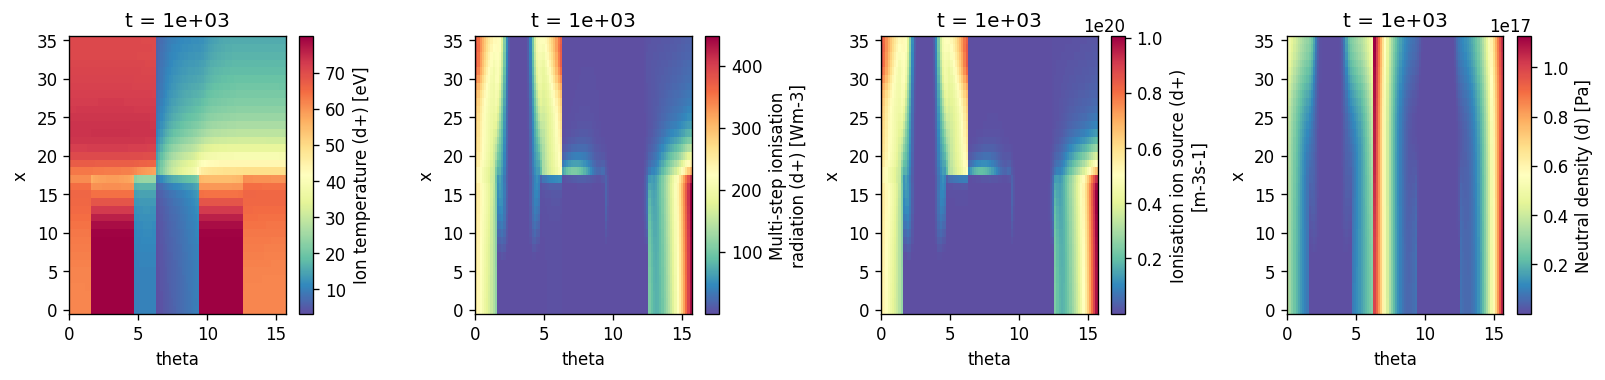

In [ ]:
data = self.ds

cols = 4
fig, axes = plt.subplots(1,cols, figsize = (cols*4,3), dpi = 120)
fig.subplots_adjust(wspace = 0.5)
# fig.tight_layout(pad = 1)
time = self.ds["t"][-1]

data["Td+"].sel(t=time).plot(ax = axes[0], cmap = "Spectral_r",
# vmin = 53, vmax = 1600, 
)
(data["Rd+_ex"].sel(t=time)*-1).plot(ax = axes[1], cmap = "Spectral_r", 
)
data["Sd+_iz"].sel(t=time).plot(ax = axes[2], cmap = "Spectral_r",
# vmin = 1.1e15, vmax = 7.2e19, 
)
data["Nd"].sel(t=time).plot(ax = axes[3], cmap = "Spectral_r", 
# vmin = 9.7e13, vmax = 2.9e19, 
)
# [ax.set_ylim(-0.9,0) for ax in axes]
print("")

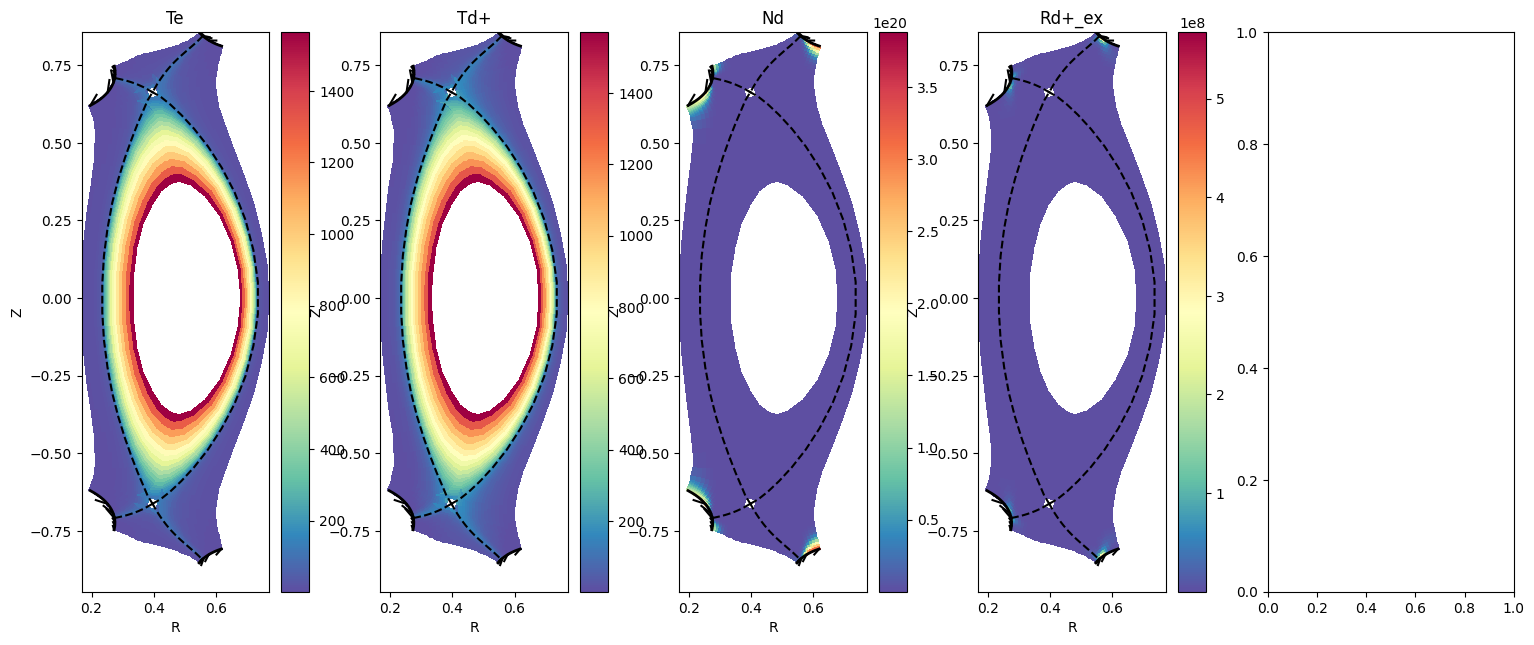

In [ ]:
data = caseng.ds

cols = 5
fig, axes = plt.subplots(1,cols, figsize = (cols*3,6), dpi = 100)
# fig.subplots_adjust(wspace = 0)
fig.tight_layout(pad = 0.4)
tind = -1

data["Te"].isel(t=tind).bout.pcolormesh(ax = axes[0], cmap = "Spectral_r", logscale = False,
# vmin = 53, vmax = 1600, 
)

data["Td+"].isel(t=tind).bout.pcolormesh(ax = axes[1], cmap = "Spectral_r", logscale = False,
# vmin = 1.1e15, vmax = 7.2e19, 
)
data["Nd"].isel(t=tind).bout.pcolormesh(ax = axes[2], cmap = "Spectral_r", logscale = False,
# vmin = 9.7e13, vmax = 2.9e19, 
)
(data["Rd+_ex"].isel(t=tind)*-1).bout.pcolormesh(ax = axes[3], cmap = "Spectral_r", logscale = False, 
)
# (data["Sd+_iz"].isel(t=tind)).bout.pcolormesh(ax = axes[2], cmap = "Spectral_r", logscale = False, 
# )
# [ax.set_ylim(-0.9,0) for ax in axes]
print("")

In [ ]:
import grid_fields
meshwrapper = grid_fields.Mesh(r"/users/mjk557/scratch/cases/st40/b2b-allsource_newmaster_scratch/g3a3f3-allflux_proper.nc")

m = meshwrapper.mesh

for param in ["Pd+_src", "Pe_src", "Nd+_src"]:
    print(f'\n-> {param}:')
    print(f'Set: {set(m[param].flatten())}')
    print(f'Integral: {(m[param].squeeze() * meshwrapper.dv).sum()}')



-> Pd+_src:
Set: {0.0, 15200943.283049459}
Integral: 1000000.0

-> Pe_src:
Set: {0.0, 11552716.895117588}
Integral: 760000.0

-> Nd+_src:
Set: {0.0, 2.280141492457419e+22}
Integral: 1.5e+21


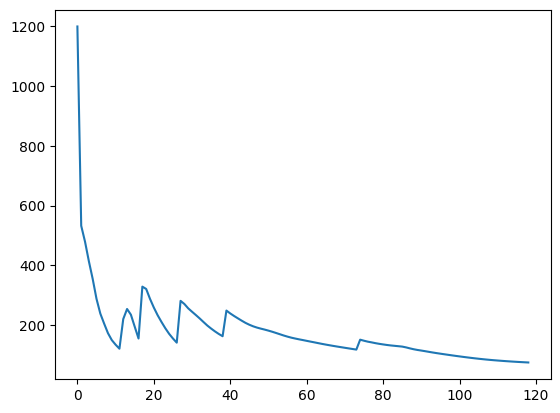

In [ ]:
plt.plot(target.peak_temperature)